# Cities I've worked and studied in

In [117]:
import pandas as pd
import geopandas as gpd


#https://gdz.bkg.bund.de/index.php/default/digitale-geodaten/verwaltungsgebiete/verwaltungsgebiete-1-1-000-000-ebenen-stand-01-01-vg1000-ebenen-01-01.html
germany_gdf = gpd.read_file("vg1000_ebenen/VG1000_LAN.shp")

UMT_EPSG = 25832
germany_gdf['geometry'] = germany_gdf['geometry'].to_crs(epsg=UMT_EPSG)

/Users/joernboegeholz/PycharmProjects/curriculum_vitae_for_data_scientists/venv/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


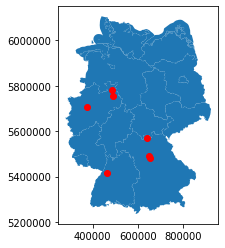

In [118]:
cities = {  "Bad Oeynhausen":
              { "latitude":5783462, "longitude":486203},
            "Detmold":
              { "latitude":5754203, "longitude":490969},
            "Coburg":
              { "latitude":5569899, "longitude":640502},
            "Bochum":
              { "latitude":5704909, "longitude":376377},
            "Karlsbad":
               { "latitude":5414315, "longitude":463944},
            "Nürnberg":
               { "latitude":5479986, "longitude":650548},
             "Erlangen - Tennenlohe":
               { "latitude":5490337, "longitude":646549}
          }

cities_df = pd.DataFrame.from_dict(cities, orient='index')
from shapely.geometry import Point
cities_df["geometry"] = cities_df.apply (lambda row: Point(row.longitude,row.latitude), axis=1)
city_gdf = gpd.GeoDataFrame(cities_df, geometry=cities_df.geometry)


ax = germany_gdf.plot()
city_gdf.plot(ax=ax, color="r")
